In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Importation des bibliothèques TensorFlow et Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Input # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

In [7]:
# Charger les données
df = pd.read_csv('air_quality_data.csv')

In [8]:
# Prétraitement des données
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Convertir en secondes
df['timestamp'] = df['timestamp'].astype(np.int64) // 10**9
features = ['timestamp', 'pm10', 'no2', 'so2', 'o3', 'co']
df = df.dropna(subset=features)

In [9]:
# Sélectionner les caractéristiques et la cible
X = df[features]
y = df['pm25']

In [10]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Définir l'architecture du modèle de réseau de neurones
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [13]:
# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [14]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step - loss: 1156.2225 - mae: 30.5925 - val_loss: 1453.3975 - val_mae: 36.8401
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1153.0427 - mae: 30.5384 - val_loss: 1449.8591 - val_mae: 36.7904
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1149.9033 - mae: 30.4853 - val_loss: 1446.4216 - val_mae: 36.7419
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1146.8451 - mae: 30.4328 - val_loss: 1443.0334 - val_mae: 36.6936
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1143.7875 - mae: 30.3803 - val_loss: 1439.6107 - val_mae: 36.6446
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1140.7527 - mae: 30.3279 - val_loss: 1436.1895 - val_mae: 36.5957
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1137.8063 - mae: 30.2766 - val_loss: 1432.7871 - val_mae: 36.5471
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1134.8759 - mae: 30.2257 - val_loss: 1429.2858 - val_mae: 36.4975
Epoch 9/50
1/1 

In [15]:
# Évaluation du modèle
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 702.0067 - mae: 24.1511
Mean Absolute Error: 24.151071548461914


In [16]:
# Faire des prédictions
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


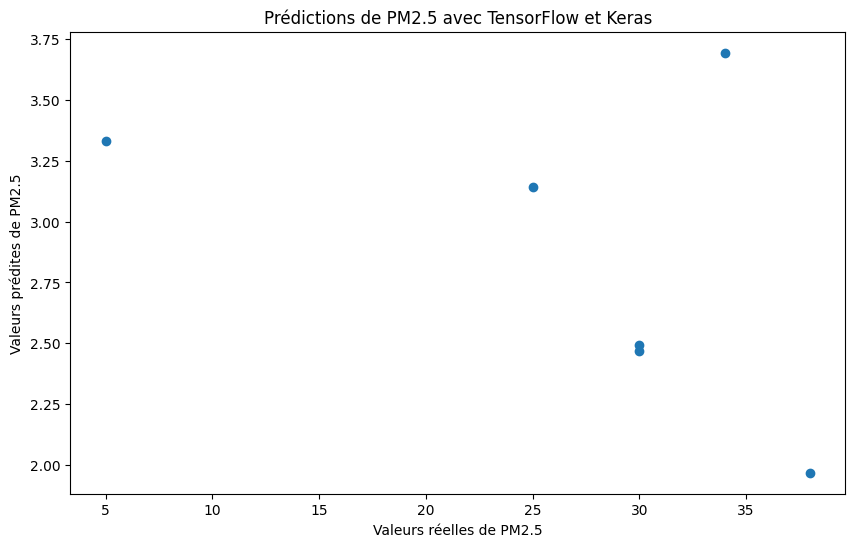

In [17]:
# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs réelles de PM2.5')
plt.ylabel('Valeurs prédites de PM2.5')
plt.title('Prédictions de PM2.5 avec TensorFlow et Keras')
plt.show()

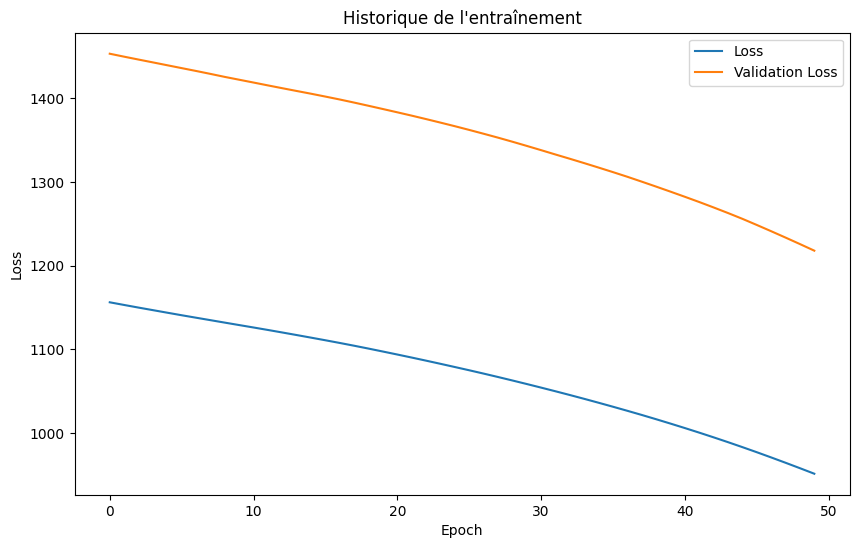

In [18]:
# Visualiser l'historique de l'entraînement
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Historique de l\'entraînement')
plt.legend()
plt.show()

Epoch 1/100


2024-05-15 12:40:39.689115: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-05-15 12:40:39.689131: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-05-15 12:40:39.689527: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
/Users/neko94/Documents/GitHub/exam_artificial_inteligence/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan - mae: nan

2024-05-15 12:40:40.307931: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-05-15 12:40:40.307942: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-05-15 12:40:40.320336: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-05-15 12:40:40.324719: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-05-15 12:40:40.326414: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: logs/fit/2024-05-15--1240/plugins/profile/2024_05_15_12_40_40/MacBook-Air-de-Jaures.local.xplane.pb


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: nan - mae: na

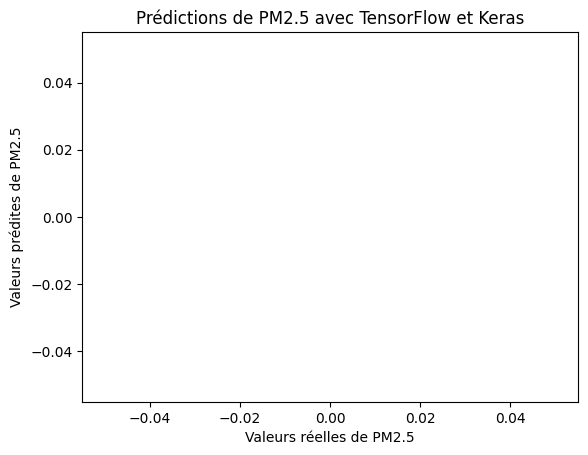

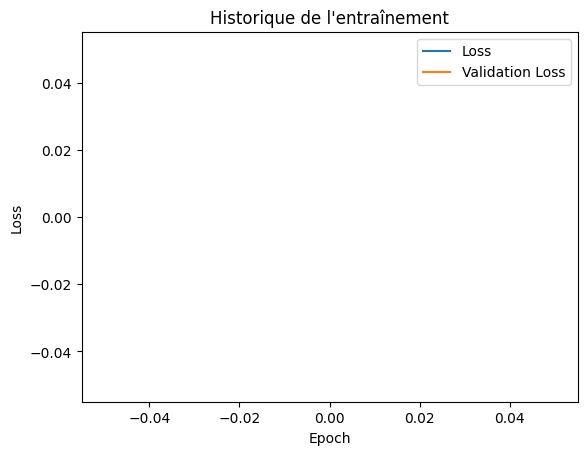

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 14138), started 0:00:22 ago. (Use '!kill 14138' to kill it.)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split
from datetime import datetime

# Charger les données
df = pd.read_csv('air_quality_data.csv')
X = df[['pm10', 'no2', 'so2', 'o3', 'co']]
y = df['pm25']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir un EarlyStopping pour arrêter l'entraînement lorsque la validation ne s'améliore plus
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Définir le répertoire des logs pour TensorBoard
log_directory = "logs/fit/" + datetime.now().strftime("%Y-%m-%d--%H%M")
board = TensorBoard(log_dir=log_directory, histogram_freq=1, write_graph=True, write_images=True, update_freq='epoch', profile_batch=2, embeddings_freq=1)

# Définir l'architecture du modèle
def create_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Créer le modèle
model = create_model()

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop, board], verbose=1)

# Évaluer le modèle sur l'ensemble de test
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error: {mae}')

# Faire des prédictions
y_pred = model.predict(X_test)

# Afficher les prédictions vs les vraies valeurs
plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs réelles de PM2.5')
plt.ylabel('Valeurs prédites de PM2.5')
plt.title('Prédictions de PM2.5 avec TensorFlow et Keras')
plt.show()

# Afficher l'historique de l'entraînement
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Historique de l'entraînement")
plt.legend()
plt.show()

# Charger l'extension TensorBoard
%load_ext tensorboard

# Démarrer TensorBoard
%tensorboard --logdir logs/fit


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'